# Data Wrangling - JSON

****
### The Data
+ Dataset includes information about projects funded by the World Bank.
+ Source: http://jsonstudio.com/resources/

****
### The Objectives

Using data in file 'data/world_bank_projects.json':
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. For some entries in the exercise above, the name is missing. Create a dataframe filling in the missing names.

## Importing and Inspecting the Data

In [9]:
# Import packages

import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [2]:
# Load json as string
df_json = json.load((open('data/world_bank_projects.json')))

In [3]:
# Read and save as Pandas dataframe
df = pd.read_json('data/world_bank_projects.json')

# Set display options to show all 50 of the columns:
pd.options.display.max_columns = 50

# View first 5 lines
df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,docty,envassesmentcategorycode,grantamt,ibrdcommamt,id,idacommamt,impagency,lendinginstr,lendinginstrtype,lendprojectcost,majorsector_percent,mjsector_namecode,mjtheme,mjtheme_namecode,mjthemecode,prodline,prodlinetext,productlinetype,project_abstract,project_name,projectdocs,projectfinancialtype,projectstatusdisplay,regionname,sector,sector1,sector2,sector3,sector4,sector_namecode,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,"Project Information Document,Indigenous People...",C,0,0,P129828,130000000,MINISTRY OF EDUCATION,Investment Project Financing,IN,550000000,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...","[{'code': 'EX', 'name': 'Education'}, {'code':...",[Human development],"[{'code': '8', 'name': 'Human development'}, {...","8,11",PE,IBRD/IDA,L,{'cdata': 'The development objective of the Se...,Ethiopia General Education Quality Improvement...,"[{'DocDate': '28-AUG-2013', 'EntityID': '09022...",IDA,Active,Africa,"[{'Name': 'Primary education'}, {'Name': 'Seco...","{'Percent': 46, 'Name': 'Primary education'}","{'Percent': 26, 'Name': 'Secondary education'}","{'Percent': 16, 'Name': 'Public administration...","{'Percent': 12, 'Name': 'Tertiary education'}","[{'code': 'EP', 'name': 'Primary education'}, ...","ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,"Project Information Document,Integrated Safegu...",C,4700000,0,P144674,0,MINISTRY OF FINANCE,Specific Investment Loan,IN,5700000,"[{'Percent': 70, 'Name': 'Public Administratio...","[{'code': 'BX', 'name': 'Public Administration...","[Economic management, Social protection and ri...","[{'code': '1', 'name': 'Economic management'},...","1,6",RE,Recipient Executed Activities,L,NaN,TN: DTF Social Protection Reforms Support,"[{'DocDate': '29-MAR-2013', 'EntityID': '00033...",OTHER,Active,Middle East and North Africa,[{'Name': 'Public administration- Other social...,"{'Percent': 70, 'Name': 'Public administration...","{'Percent': 30, 'Name': 'General public admini...",NaN,NaN,"[{'code': 'BS', 'name': 'Public administration...","BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,"Resettlement Plan,Environmental Assessment,Int...",B,0,0,P145310,6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Investment Project Financing,IN,6060000,"[{'Percent': 100, 'Name': 'Transportation'}]","[{'code': 'TX', 'name': 'Transportation'}]","[Trade and integration, Public sector governan...","[{'code': '5', 'name': 'Trade and integration'...","5,2,11,6",PE,IBRD/IDA,L,NaN,Tuvalu Aviation Investment Project - Additiona...,"[{'DocDate': '21-OCT-2013', 'EntityID': '00033...",IDA,Active,East Asia and Pacific,[{'Name': 'Rural and Inter-Urban Roads and Hig...,"{'Percent': 100, 'Name': 'Rural and Inter-Urba...",NaN,NaN,NaN,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17

In [4]:
#Inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

In [5]:
# View column names to identify if there are inconsistencies or trailing spaces
df.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

The column names look consistent. Let's dig into the first question!

#### 1. Find the 10 countries with most projects
Approach: Count the number of entries from the 'countryname' column.  

In [6]:
# Isolate the 'countryname' column
df_countrynames = df.countryname 

# Count how many times each country's name appears. Return the top 10.
top_10_countries = df_countrynames.value_counts().head(10)
top_10_countries

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Nepal                              12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

Note that 'Africa' is not a single country. Depending on our objectives, we might decide to:
+ Count Africa as a country
+ Attempt to identify the specific country (or countries) represented by these rows
+ Discard the 'Africa' rows 

For this exercise, we'll count it.

#### Visualizing the data - Is it rare for a country to have 11 to 19 projects?

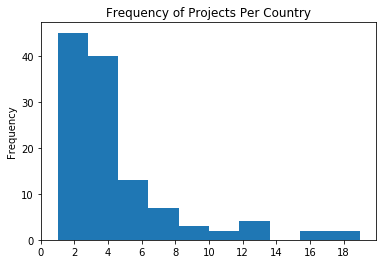

In [11]:
# Plot histogram to see how many projects a country typically has.
t2 = 'Frequency of Projects Per Country'
k2 = 'hist'
ticks = range(0, 20, 2)
df.countryname.value_counts().plot(kind = k2, title = t2, xticks = ticks)
plt.show()

Let's zoom in on the top 10 countries with a bar plot.

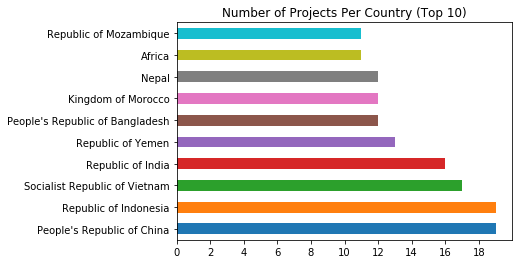

In [12]:
# Plot the top 10 with a bar plot.
t = 'Number of Projects Per Country (Top 10)'
k = 'barh'
df.countryname.value_counts().head(10).plot(kind = k, title = t, xticks = ticks)

plt.show()

#### 2. Find the top 10 major project themes (using column 'mjtheme_namecode')
Approach: 
+ Inspect the 'mjtheme_namecode' column. 
+ Create a table from the nested data by normalizing the column. 
+ Count the 'code' column to find top 10 themes.

In [13]:
# Inspect the column.
df_theme=df['mjtheme_namecode']
df_theme.head(10)

0    [{'code': '8', 'name': 'Human development'}, {...
1    [{'code': '1', 'name': 'Economic management'},...
2    [{'code': '5', 'name': 'Trade and integration'...
3    [{'code': '7', 'name': 'Social dev/gender/incl...
4    [{'code': '5', 'name': 'Trade and integration'...
5    [{'code': '6', 'name': 'Social protection and ...
6    [{'code': '2', 'name': 'Public sector governan...
7    [{'code': '11', 'name': 'Environment and natur...
8    [{'code': '10', 'name': 'Rural development'}, ...
9    [{'code': '2', 'name': 'Public sector governan...
Name: mjtheme_namecode, dtype: object

In [14]:
# Looking at a single row, we see that a project can have multiple themes.
df_theme[2]

[{'code': '5', 'name': 'Trade and integration'},
 {'code': '2', 'name': 'Public sector governance'},
 {'code': '11', 'name': 'Environment and natural resources management'},
 {'code': '6', 'name': 'Social protection and risk management'}]

In [15]:
# Use normalization to create a table from the nested element
themes = json_normalize(df_json, 'mjtheme_namecode')
themes.head(10)

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [16]:
# Use the value_counts method to find the top themes.
theme_counts = themes.code.value_counts()
theme_counts

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
3      15
Name: code, dtype: int64

There are 11 theme types. Theme # 11 is most frequent and theme # 3 as least.

#### 3. For some entries in the exercise above, the name is missing. Create a dataframe filling in the missing names.
Approach: 
+ Change the missing name values to NaN.
+ Sort the themes dataframe by the code column.
+ Fill in the NaN values.
+ Count the 'name' column to find top 10 themes.

In [17]:
# Find out how many blank name entries there are.
themes.name.value_counts(dropna=False)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Rule of law                                      12
Name: name, dtype: int64

In [18]:
# Replace blank name values with NaN.
themes['name'] = themes['name'].replace({'': np.nan})

In [19]:
# Sort the data to group the NaN values together.
themes_sorted = themes.sort_values(by = ['code', 'name'])
themes_sorted[themes_sorted.code == '1'].tail(10)

,code,name
1229,1,Economic management
1230,1,Economic management
1235,1,Economic management
1257,1,Economic management
1260,1,Economic management
212,1,NaN
363,1,NaN
1024,1,NaN
1114,1,NaN
1437,1,NaN


In [20]:
# Fill the theme names down.
themes_filled = themes_sorted.ffill()

# Check that the NaN values are gone.
themes_filled[themes_filled.code == '1'].tail(10)

,code,name
1229,1,Economic management
1230,1,Economic management
1235,1,Economic management
1257,1,Economic management
1260,1,Economic management
212,1,Economic management
363,1,Economic management
1024,1,Economic management
1114,1,Economic management
1437,1,Economic management


In [21]:
# Count the frequency of each theme, by theme name instead of code.
theme_counts_name = themes_filled.name.value_counts()
theme_counts_name

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Rule of law                                      15
Name: name, dtype: int64

Now we see that "Environment and natural resources management" is the most frequent theme.  
"Rule of law" is the least frequent theme and misses the top 10.

## Summary

We examined a dataset for projects funded by the World Bank. Our goals were to identify ten countries with the most projects, as well as the most common project themes.

---

+ **Import Packages, Load JSON file as a Dataframe, Inspect** - Looked at the structure of the dataset. Inspect the columns needed for the exercises.

+ **Find the 10 Countries with the Most Projects** - Extracted the country name column and counted the number of times each value occured. Visualized the number of projects per country with a histogram and bar plot. 

|Country Name|Number of Projects|
|:--------------|-------------------|
|Republic of Indonesia|              19|
|People's Republic of China|         19|
|Socialist Republic of Vietnam|      17|
|Republic of India|                  16|
|Republic of Yemen|                  13|
|People's Republic of Bangladesh|    12|
|Kingdom of Morocco|                 12|
|Nepal|                              12|
|Republic of Mozambique|             11|
|Africa|                             11|


+ **Find the Top 10 Major Project Themes** - The theme column contained nested data, so it was normalized to create a table. From the new theme dataframe, the project theme codes were counted, as the theme names had missing values.

+ **Find the Top 10 Major Project Themes by Theme Name** - The theme names column contained missing text. To fill the these, the missing values were changed to NaN, the dataframe was sorted, and the theme names were forwardfilled. A more descriptive list of top project themes was produced by doing a value count of the new, complete names column.


|Project Name|Number of Projects|
|:-----------|------------------|
|Environment and natural resources management|    250|
|Rural development|                               216|
|Human development|                               210|
|Public sector governance|                        199|
|Social protection and risk management|           168|
|Financial and private sector development|        146|
|Social dev/gender/inclusion|                     130|
|Trade and integration|                            77|
|Urban development|                                50|
|Economic management|                              38|